In [4]:
#Ryan Orsini
#Data Incubator 
#Deadline - Monday April 30th, 2018


#Import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from ggplot import *


#Get working directory
os.getcwd()

#Change working directory
os.chdir('/Users/rhinomonkey/Desktop/data_incubator/Data/')

#Assigned Variables to correct data sets after initial cleaning in Excel. 
#Assign m_spend to data for Total Military Spending per Country
m_spend = pd.read_excel("country_spending.xlsx", na_values=['. .','xxx'])
m_spend = m_spend.set_index(['Country'])


#Assign percent_gdp to Military Spending as Percent of GDP per Country 
percent_gdp = pd.read_excel('perc_of_gdp.xlsx', na_values=['. .','xxx'])
percent_gdp = percent_gdp.set_index(['Country'])
percent_gdp.head()

#Assign per_cap to Military Spending per Capita
#Determine which data sets you will be using - World Bank or SIPRI
per_cap = pd.read_excel('per_capita_spending.xlsx',  na_values=['. .','xxx'])
per_cap = per_cap.set_index(["Country"])
per_cap.head()

#Want to have 10 years of data to work with

#Determine top ten military spenders by amt. of money
#Create a data frame with 'Countries' as the column headers and all of their values per year below
#This enables the .mean function to work so that I can glean the top ten from the list

#Goals:

#Sort each data set by country / military spending / GDP / per person military spending

#Find Fastest growing countries in military spending over the course of the 10 years 

#Compare the data to that country’s GDP
#After sorting by military spending show each country's GPD (good comparisons will be ratios)

#Take all countries in the top ten and compare them to each other's spending 

#Find or calculate (total military spending per person to per person GPD)

#Over a period of time determine the rate of increase of each country’s spending

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,42.680972,34.587083,36.138964,22.037128,40.093702,47.479404,48.549303,44.000541,50.844746,60.333802,...,92.770179,116.540112,149.528401,149.727463,157.632695,235.646623,248.734155,274.549162,246.186835,258.444130
Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.469678,...,107.971230,110.577344,187.086505,NaN,NaN,NaN,497.570521,NaN,533.207566,NaN
Morocco,39.187813,41.357567,44.491972,46.829461,49.143028,49.149418,52.659493,54.494759,53.900800,51.298041,...,69.972952,78.089240,94.459328,96.943246,99.237224,103.852455,104.627662,123.749804,122.023296,97.550858
Tunisia,29.976878,29.590648,30.396846,31.309333,34.119802,32.217351,33.811616,38.278908,43.730829,38.867778,...,49.092878,47.985385,56.047196,54.097312,54.156542,67.007644,63.216959,69.749139,83.814092,88.164405
Angola,129.221966,166.785877,145.990259,83.468052,62.407766,135.377880,NaN,16.817239,11.152826,30.963969,...,102.364356,102.513512,154.918522,157.428481,161.595035,163.103718,180.326960,257.286854,280.599782,143.382458


In [3]:
#Military Spending for Years 2005 - 2015
m_spend10 = m_spend.drop(m_spend.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,-1]], axis=1)
m_spend10['mean']=m_spend10.mean(axis=1)
#Sort by mean of the last ten years
m_spend10 = m_spend10.sort_values("mean", ascending=False)
m_spend10


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
Country,,,,,,,,,,,,
USA,610175.788230,619653.092855,635921.046522,682967.143011,737746.788448,757992.495161,748645.970762,706082.085100,650081.468798,609914.000000,595472.054945,668604.721257
"China, P.R.",79808.744205,92586.239956,103715.573389,113527.041955,137400.845513,144382.716698,155897.745121,169321.141160,182930.077777,199651.442932,214485.460938,144882.457240
USSR/Russia,43010.035285,47601.168383,51813.962142,56933.299668,59730.224849,60939.656376,65040.310180,75364.320754,79030.424094,84696.504653,91080.941893,65021.895298
UK,63921.712822,64333.746426,66369.789390,69332.111158,70679.181692,69192.037557,66270.535439,63446.206956,60766.435401,59182.858554,59729.580120,64838.563229
France,64234.949418,64525.443444,64773.105461,64124.450664,68451.289191,65322.171497,63725.141400,62844.361384,62686.493042,63613.569143,60746.975112,64095.268160
Saudi Arabia,38007.886590,43297.164318,49872.349510,48949.003630,50299.257470,52350.008070,53062.287649,60040.554470,68809.615185,80762.400000,85354.421561,57345.904405
Germany,46829.973892,45748.975490,45788.663966,47104.347558,48884.513194,49417.787862,48004.149910,49148.901300,46311.882497,46102.673010,47045.500783,47307.942678
Japan,47155.142278,46558.292668,45954.078647,45514.669185,46364.493723,46526.583286,47160.597659,46583.911779,46379.979503,45866.786169,46345.834352,46400.942659
India,35548.273490,35718.474780,36150.890040,41003.299878,48277.116021,48470.087471,48939.661640,48765.532315,48406.327103,50914.108341,51115.903888,44846.334088


In [5]:
#Miltary Spending for 2015 (in 2014 dollars)
m_spend2015 = m_spend.drop(m_spend.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28]], axis=1)
#Sort by 2015 spending
m_spend2015 = m_spend2015.sort_values(2015, ascending=False)
m_spend2015

,2015
Country,
USA,595472.054945
"China, P.R.",214485.460938
USSR/Russia,91080.941893
Saudi Arabia,85354.421561
France,60746.975112
UK,59729.580120
India,51115.903888
Germany,47045.500783
Japan,46345.834352


In [6]:
#Military spending - top tens sorted by mean
m_spend_top_ten_mean = m_spend10[0:10]
m_spend_top_ten_mean
#Military spending - top tens for 2015 spending
m_spend_top_ten_2015 = m_spend2015[0:10]
m_spend_top_ten_2015

,2015
Country,
USA,595472.054945
"China, P.R.",214485.460938
USSR/Russia,91080.941893
Saudi Arabia,85354.421561
France,60746.975112
UK,59729.580120
India,51115.903888
Germany,47045.500783
Japan,46345.834352


In [7]:
#Percent of GDP used for military spending - 2005 - 2015
percent_gdp10 = percent_gdp.drop(percent_gdp.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1)
percent_gdp10['mean']=percent_gdp10.mean(axis=1)
#Sort by mean percentage of spending
percent_gdp10 = percent_gdp10.sort_values('mean', ascending=False) 
percent_gdp10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
Country,,,,,,,,,,,,
Oman,0.118170,0.108292,0.102794,0.075800,0.092796,0.083477,0.098143,0.161566,0.149502,0.138674,0.161743,0.117360
Saudi Arabia,0.077306,0.078484,0.085270,0.073534,0.096172,0.085884,0.072488,0.076977,0.090040,0.107331,0.136798,0.089117
South Sudan,NaN,NaN,NaN,0.057614,0.049685,0.041407,0.059052,0.095308,0.083188,0.117953,0.137773,0.080247
Israel,0.076597,0.075167,0.067892,0.065890,0.067704,0.062511,0.059489,0.057316,0.058075,0.059515,0.054457,0.064056
Jordan,0.047954,0.046593,0.060339,0.061821,0.065840,0.056642,0.055298,0.047606,0.043012,0.043264,0.042354,0.051884
Djibouti,0.063268,0.064326,0.040618,0.037290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051376
UAE,0.036565,0.032261,0.032805,0.036680,0.054571,0.061194,0.055037,0.050944,0.060851,0.056966,NaN,0.047788
Yemen,0.042835,0.036039,0.040981,0.039359,0.049923,0.046856,0.051876,0.050471,0.047495,0.046184,NaN,0.045202
Georgia,0.033392,0.052183,0.091591,0.085201,0.056066,0.039024,0.032476,0.031046,0.025281,0.025144,0.024040,0.045040


In [8]:
#Percent of GDP - only year 2015
percent_gdp2015 = percent_gdp.drop(percent_gdp.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]],axis=1)
percent_gdp2015 = percent_gdp2015.sort_values(2015, ascending=False)

In [9]:
#Top ten after sorted by mean & also year 2015
percent_gdp_top_ten_mean = percent_gdp10[0:10]
percent_gdp_top_ten_mean
percent_gdp_top_ten_2015 = percent_gdp2015[0:10]
percent_gdp_top_ten_2015


,2015
Country,
Oman,0.161743
South Sudan,0.137773
Saudi Arabia,0.136798
Iraq,0.091476
Algeria,0.061901
Israel,0.054457
USSR/Russia,0.053869
Azerbaijan,0.046334
Bahrain,0.046234


In [10]:
#For Per Capita - must compare to per person gdp. Since Per capita military spending is merely a share of GDP
#I can get per capita GDP from percent military spending of GDP 
#per capita gdp = per capita military spending / percent miilitary spending of gdp 

#Get Top Ten Millitary Spending Per Capita

#Create a data frame that creates per capita GDP from per capita military spending and % military spending


In [11]:
#Military Spending Per Capita - 2005 - 2015 
per_cap10 = per_cap.drop(per_cap.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1)
#Per Capita sorted by mean
per_cap10 ['mean'] = per_cap10.mean(axis=1)
per_cap10 = per_cap10.sort_values('mean', ascending=False)
per_cap10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
Country,,,,,,,,,,,,
Oman,1394.963944,1509.426611,1586.991138,1657.682224,1557.400970,1696.772463,2227.738151,3747.857873,3252.205489,2946.291474,2573.688773,2195.547192
USA,1699.856475,1765.162413,1844.834268,2038.379748,2175.092884,2253.931257,2279.381559,2178.039580,2019.637434,1911.506699,1854.404032,2001.838759
UAE,1608.431700,1429.652564,1360.507135,1433.203049,1687.359910,2118.186964,2253.495806,2169.719209,2608.909528,2446.255803,NaN,1911.572167
Israel,1561.587161,1622.618341,1671.523824,1928.991734,1868.402913,1910.441266,1980.231033,1864.411791,2094.562072,2204.830937,1923.370122,1875.542836
Saudi Arabia,1088.385709,1226.287511,1422.136763,1482.255917,1547.848918,1641.495241,1710.280989,1935.123533,2234.446889,2624.712382,2777.858493,1790.075668
Singapore,1280.785469,1324.818783,1420.468286,1540.467886,1511.179202,1597.173807,1721.116475,1726.646841,1731.002129,1767.445968,1705.112078,1575.110629
Kuwait,1173.325914,1130.322494,1210.510804,1287.141801,1207.710533,1210.274889,1464.836045,1569.758689,1464.798774,1485.976463,NaN,1320.465641
Norway,1054.599510,1072.720241,1244.237209,1330.879880,1279.290440,1324.095159,1454.305366,1418.015519,1450.516049,1422.434756,1131.482679,1289.325164
Qatar,1080.998782,1100.972891,1356.098329,1491.312741,1193.842922,1146.461968,NaN,NaN,NaN,NaN,NaN,1228.281272


In [12]:
#Military Spending per Capita only 2015 - sorted by 2015 spending
per_cap2015 = per_cap.drop(per_cap.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1)
per_cap2015 = per_cap2015.sort_values(2015, ascending=False)
per_cap2015

,2015
Country,
Saudi Arabia,2777.858493
Oman,2573.688773
Israel,1923.370122
USA,1854.404032
Singapore,1705.112078
Norway,1131.482679
Bahrain,1104.730507
Brunei,1012.145470
Australia,981.714524


In [13]:
#Top ten of both sorted by mean and year 2015
per_cap_top_ten_mean = per_cap10[0:10]
per_cap_top_ten_mean
per_cap_top_ten_2015 = per_cap2015[0:10]
per_cap_top_ten_2015

,2015
Country,
Saudi Arabia,2777.858493
Oman,2573.688773
Israel,1923.370122
USA,1854.404032
Singapore,1705.112078
Norway,1131.482679
Bahrain,1104.730507
Brunei,1012.145470
Australia,981.714524


In [14]:
#Make Data Frame with per capita GDP
per_cap_gdp = per_cap10/percent_gdp10
per_cap_gdp_mean = per_cap_gdp.sort_values('mean', ascending=False)
per_cap_gdp_2015 = per_cap_gdp.drop(per_cap_gdp.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)
per_cap_gdp_2015 = per_cap_gdp_2015.sort_values(2015, ascending=False)
per_cap_gdp_2015

#Per Capita GDP Top Ten Sorted by year 2015
pcgdp_tt_mean = per_cap_gdp_mean[0:10]
pcgdp_tt_mean 

#Per Capita GDP Top Ten Sorted by year 2015
pcg_tt_2015 = per_cap_gdp_2015[0:10]
pcg_tt_2015


,2015
Country,
Luxembourg,100230.606076
Switzerland,81549.521059
Norway,75203.050402
USA,55904.296693
Singapore,52508.047575
Denmark,51432.060960
Australia,51197.400515
Sweden,49107.318726
Ireland,48800.698092


[Text(0,0.5,'US Dollars (Adjusted to 2014)'),
 Text(0.5,0,'Spending from 2005-2015 by Country')]

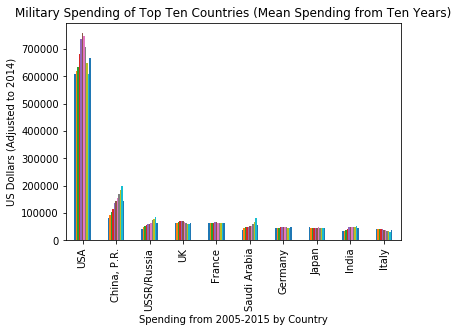

In [16]:
#Drop Mean from data set m_spend10 & assign to new data frame
m_spend10_nomean = m_spend10.drop(m_spend10.columns[[10]], axis=1)
m_spend10_nomean_topten =m_spend10_nomean[0:10]
#Graph
B1=m_spend10_nomean_topten.plot(kind='bar',legend=False, title='Military Spending of Top Ten Countries (Mean Spending from Ten Years)')
B1.set(ylabel="US Dollars (Adjusted to 2014)", xlabel="Spending from 2005-2015 by Country")

[<matplotlib.text.Text at 0x12b9db400>, <matplotlib.text.Text at 0x12b7f0a58>]

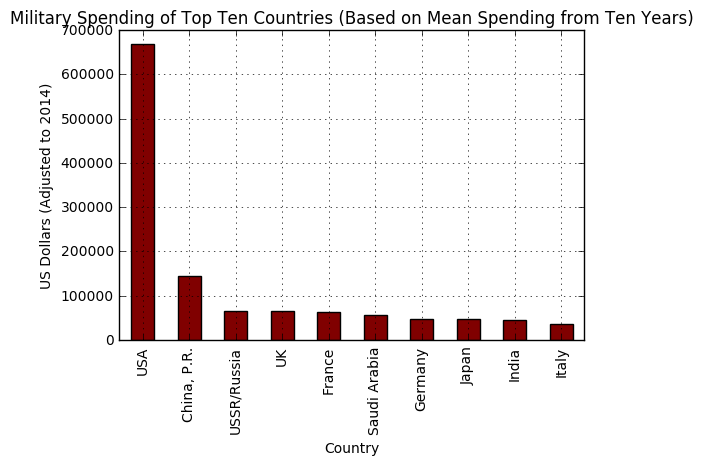

In [184]:
#Make a data frame with solely Country and Mean
m_spend10_onlymean = m_spend10.drop(m_spend.columns[[17,18,19,20,21,22,23,24,25,26,27]], axis=1)
m_spend10_onlymean_topten = m_spend10_onlymean[0:10]
#Graph in a bar chart
B2=m_spend10_onlymean_topten.plot(kind="bar", title='Military Spending of Top Ten Countries (Based on Mean Spending from Ten Years)',
                                   grid = True, color="maroon",legend=False)
B2.set(ylabel="US Dollars (Adjusted to 2014)", xlabel="Country")


[<matplotlib.text.Text at 0x12bce07b8>, <matplotlib.text.Text at 0x12bb4e198>]

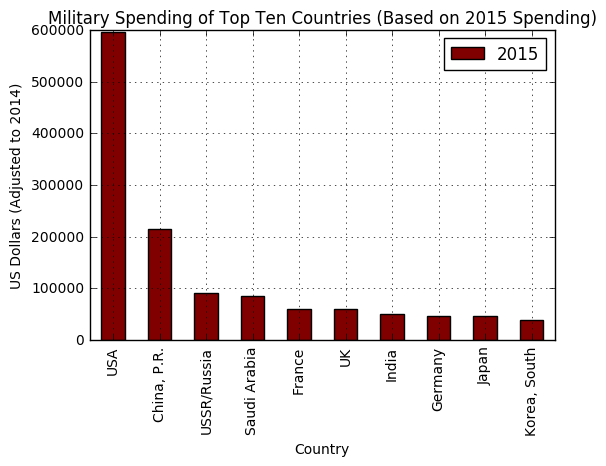

In [185]:
#Bar Graph of Top Ten Countries Based on 2015 Spending
B3=m_spend_top_ten_2015.plot(kind='bar',title="Military Spending of Top Ten Countries (Based on 2015 Spending)", color="maroon", grid=True)
B3.set(ylabel="US Dollars (Adjusted to 2014)", xlabel="Country")
#Note that the ordering is different and Italy is no longer on the graph (replaced by South Korea)

[<matplotlib.text.Text at 0x12bfda550>, <matplotlib.text.Text at 0x12b255978>]

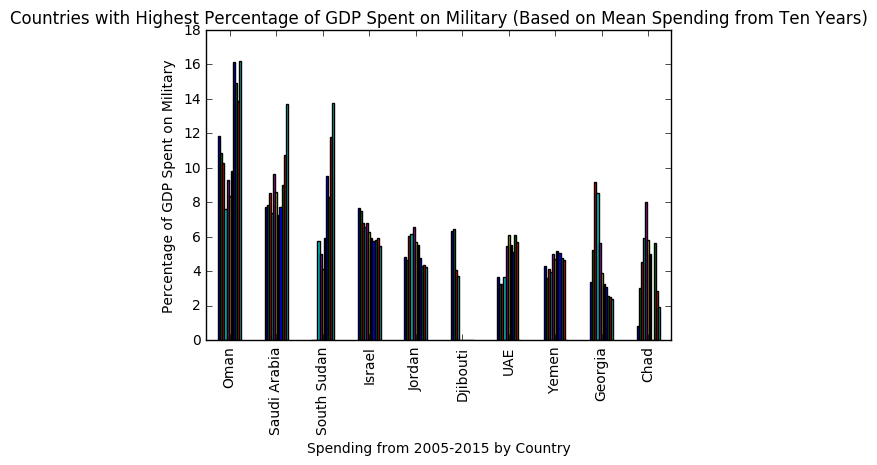

In [186]:
#Percent Military Spending Takes up of GDP
percent_gdp10_nomean = percent_gdp10.drop(percent_gdp10.columns[11],axis=1)
percent_gdp10_nomean = percent_gdp10_nomean[0:10]
percent_gdp10_nomean = percent_gdp10_nomean*100
B4=percent_gdp10_nomean.plot(kind='bar', legend=False, title="Countries with Highest Percentage of GDP Spent on Military (Based on Mean Spending from Ten Years)")
B4.set(ylabel="Percentage of GDP Spent on Military", xlabel="Spending from 2005-2015 by Country")

[<matplotlib.text.Text at 0x12c25ab38>, <matplotlib.text.Text at 0x12c188240>]

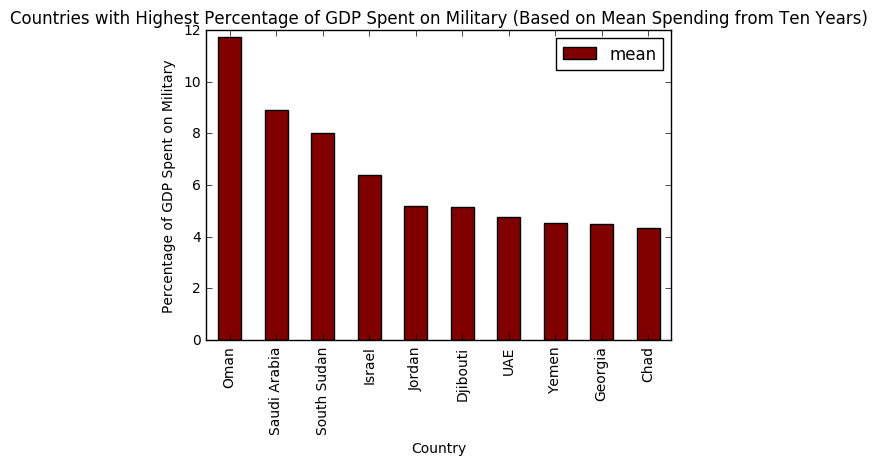

In [187]:
#Bar Graph of Highest Percentage of GDP Spent on Military (Only Mean Values)
percent_gdp10_onlymean=percent_gdp_top_ten_mean.drop(percent_gdp_top_ten_mean.columns[[0,1,2,3,4,5,6,7,8,9,10]],axis=1)
percent_gdp10_onlymean=percent_gdp10_onlymean*100
B5=percent_gdp10_onlymean.plot(kind='bar', title='Countries with Highest Percentage of GDP Spent on Military (Based on Mean Spending from Ten Years)', color="maroon")
B5.set(xlabel='Country', ylabel="Percentage of GDP Spent on Military")

[<matplotlib.text.Text at 0x12c41a668>, <matplotlib.text.Text at 0x12c193ac8>]

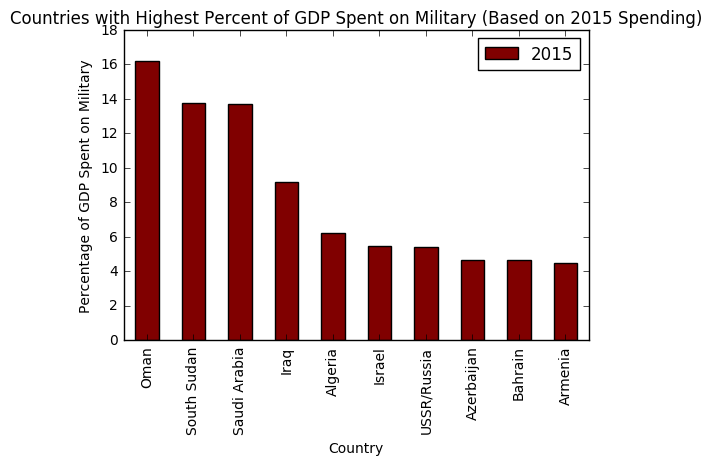

In [188]:
#Bar Graph of Highest Percentage of GDP Spent on Military (Based on 2015 Spending)
percent_gdp_tt_2015=percent_gdp_top_ten_2015*100
B6=percent_gdp_tt_2015.plot(kind='bar',title="Countries with Highest Percent of GDP Spent on Military (Based on 2015 Spending)", color="maroon")
B6.set(xlabel="Country",ylabel="Percentage of GDP Spent on Military")

[<matplotlib.text.Text at 0x12bfdbc50>, <matplotlib.text.Text at 0x12c1caa58>]

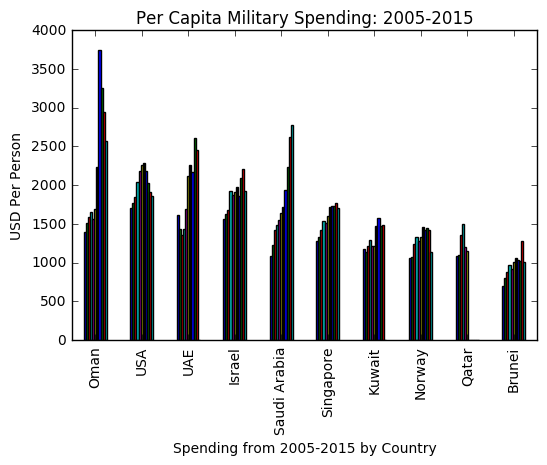

In [189]:
#Bar Graph of Countries with Top Ten Per Capita Military Spending 2005-2015
per_cap10_nomean = per_cap10.drop(per_cap10.columns[[11]], axis=1)
per_cap10_nomean = per_cap10_nomean[0:10]
B7=per_cap10_nomean.plot(kind="bar",legend=False, title="Per Capita Military Spending: 2005-2015")
B7.set(xlabel="Spending from 2005-2015 by Country", ylabel="USD Per Person")

[<matplotlib.text.Text at 0x12775a5f8>, <matplotlib.text.Text at 0x129699160>]

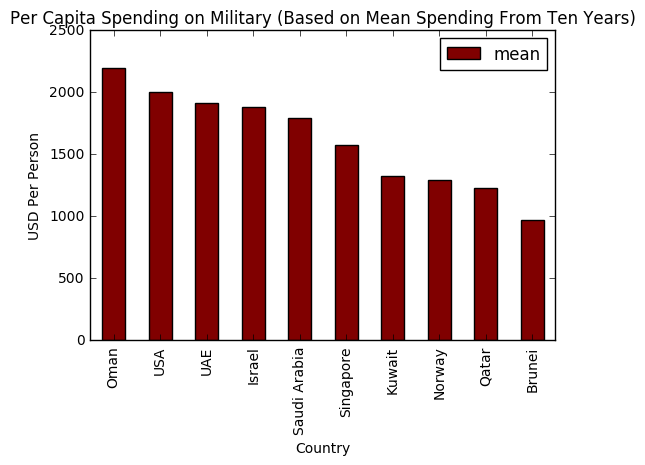

In [190]:
per_cap_meanonly=per_cap_top_ten_mean.drop(per_cap_top_ten_mean.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
B8=per_cap_meanonly.plot(kind='bar', title='Per Capita Spending on Military (Based on Mean Spending From Ten Years)',color="maroon")
B8.set(xlabel="Country",ylabel="USD Per Person")



[<matplotlib.text.Text at 0x128e70390>, <matplotlib.text.Text at 0x12ac6c2e8>]

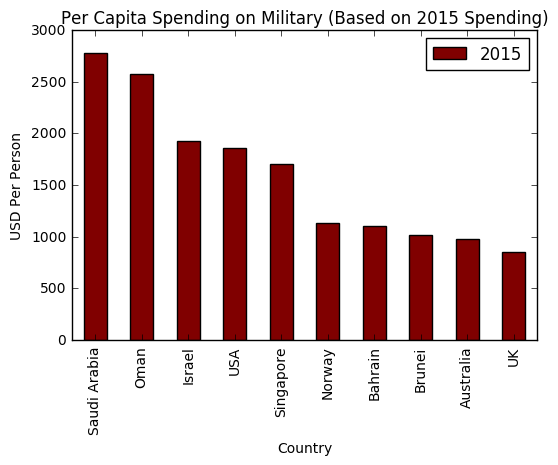

In [191]:
B9=per_cap_top_ten_2015.plot(kind="bar",title="Per Capita Spending on Military (Based on 2015 Spending)", color="maroon")
B9.set(xlabel="Country", ylabel="USD Per Person")

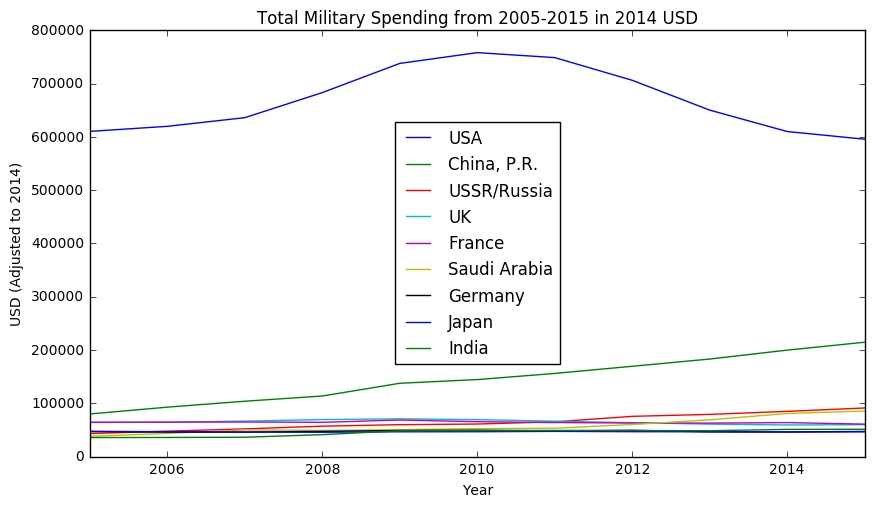

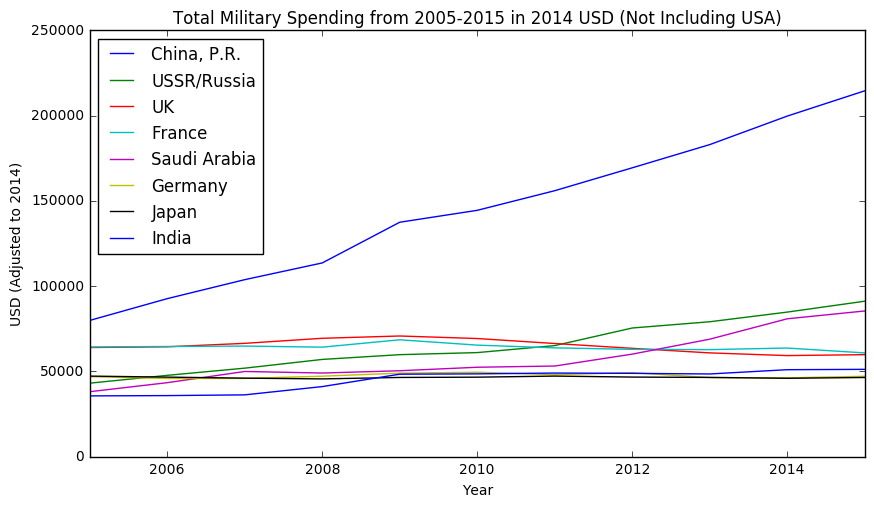

In [192]:
#Line Graph of Military Spending Over 2005-2015
ms=pd.read_excel("csb.xlsx")
P1=ms.plot(kind="line", x='Year',figsize=(10,5.5),title="Total Military Spending from 2005-2015 in 2014 USD")
P1.set(ylabel='USD (Adjusted to 2014)')

#Without USA
ms_nousa=ms.drop(ms.columns[[1]], axis=1)
P2=ms_nousa.plot(kind='line', x="Year",figsize=(10,5.5),title="Total Military Spending from 2005-2015 in 2014 USD (Not Including USA)")
P2.set(ylabel="USD (Adjusted to 2014)")



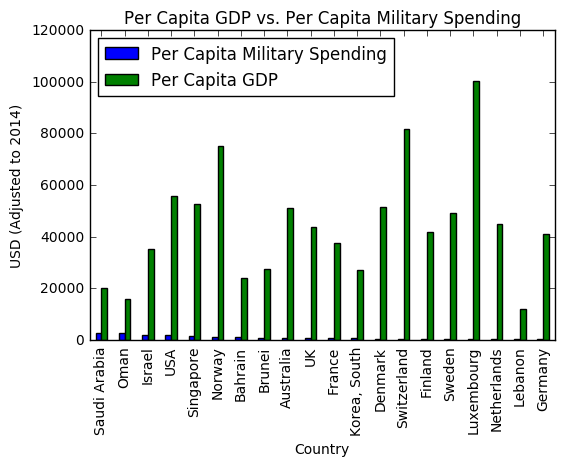

In [193]:
capitas_combined=per_cap2015
capitas_combined["Per Capita GDP"]=per_cap_gdp_2015
capitas_combined=capitas_combined.rename(columns={2015:"Per Capita Military Spending"})
capitas_combined20=capitas_combined[0:20]
P3=capitas_combined20.plot.bar(title="Per Capita GDP vs. Per Capita Military Spending")
P3.set(ylabel='USD (Adjusted to 2014)')

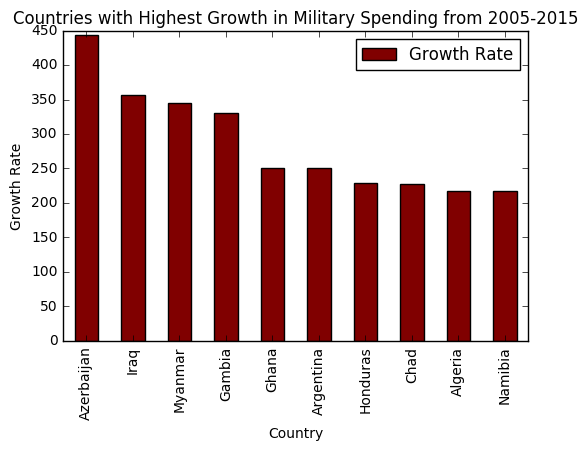

In [194]:
#Growth Rates of Top Ten Countries
m_spend_growth=m_spend10
m_spend_growth["Growth Rate"]=abs(m_spend_growth[2015]-m_spend[2005])/m_spend_growth[2005]*100
m_spend_growth=m_spend_growth.sort_values("Growth Rate", ascending=False)
m_spend_growth_tt=m_spend_growth[0:10]
m_spend_growth_tt=m_spend_growth_tt.drop(m_spend_growth_tt.columns[[0,1,2,3,4,5,6,7,8,9,10,11]],axis=1)
m_spend_growth_tt

#Graph of Fastest Growing Countries
P4=m_spend_growth_tt.plot(kind='bar',title="Countries with Highest Growth in Military Spending from 2005-2015", color='maroon')
P4.set(ylabel="Growth Rate")

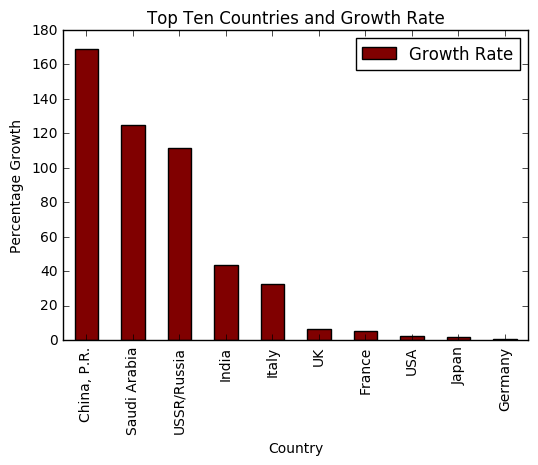

In [195]:
#Graph of Fastest Growth Rate in Top Ten Military Spending Countries By Mean

m_spend_growth_meanoftt=m_spend_growth.sort_values("mean", ascending=False)
m_spend_growth_meanoftt=m_spend_growth_meanoftt[0:10]
m_spend_growth_meanoftt=m_spend_growth_meanoftt.sort_values("Growth Rate", ascending=False)
m_spend_growth_meanoftt=m_spend_growth_meanoftt.drop(m_spend_growth_meanoftt.columns[[0,1,2,3,4,5,6,7,8,9,10,11]],axis=1)
P5=m_spend_growth_meanoftt.plot(kind='bar', color="maroon",title="Top Ten Countries and Growth Rate")
P5.set(ylabel="Percentage Growth")

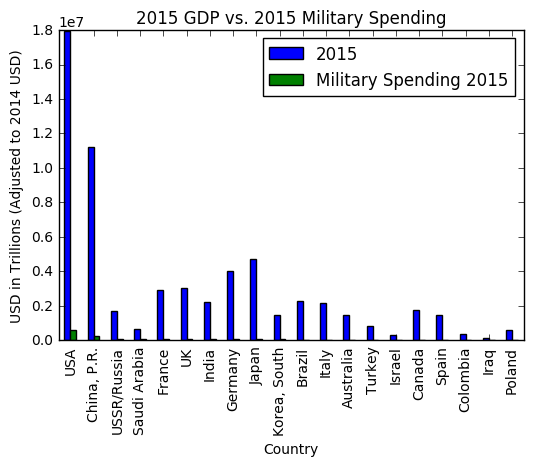

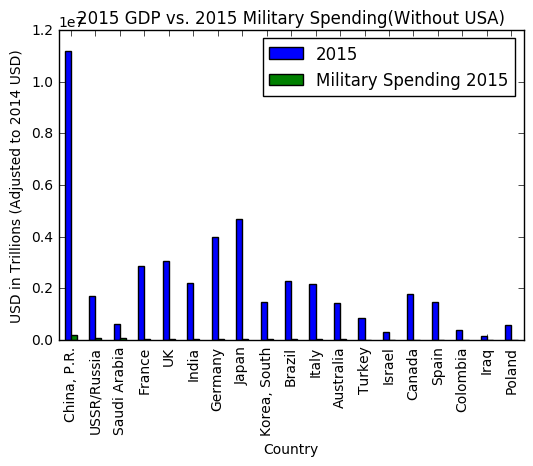

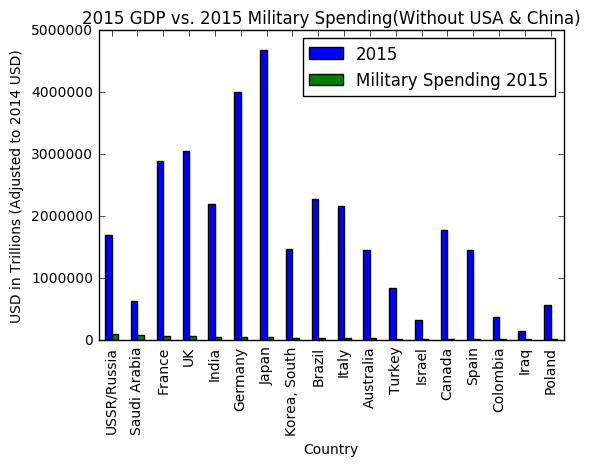

In [196]:
#GDP vs. Military Spending in Numbers (2015)
m_spend_gdp_2015=m_spend2015/percent_gdp2015
m_spend_gdp_2015["Military Spending 2015"]=m_spend2015
m_spend_gdp_2015=m_spend_gdp_2015.sort_values('Military Spending 2015',ascending=False)
m_spend_gdp_2015=m_spend_gdp_2015[0:20]
P6=m_spend_gdp_2015.plot(kind="bar",title="2015 GDP vs. 2015 Military Spending")
P6.set(ylabel="USD in Trillions (Adjusted to 2014 USD)")

#Without USA
m_spend_gdp_2015nousa=m_spend_gdp_2015.drop(m_spend_gdp_2015.index[0])
P7=m_spend_gdp_2015nousa.plot(kind='bar', title="2015 GDP vs. 2015 Military Spending(Without USA)")
P7.set(ylabel="USD in Trillions (Adjusted to 2014 USD)")
#Without USA & China 
m_spend_gdp_2015nousorchina=m_spend_gdp_2015nousa.drop(m_spend_gdp_2015nousa.index[0])
P9=m_spend_gdp_2015nousorchina.plot(kind='bar', title="2015 GDP vs. 2015 Military Spending(Without USA & China)")
P9.set(ylabel="USD in Trillions (Adjusted to 2014 USD)")

[<matplotlib.text.Text at 0x12d7f3e10>, <matplotlib.text.Text at 0x128e04898>]

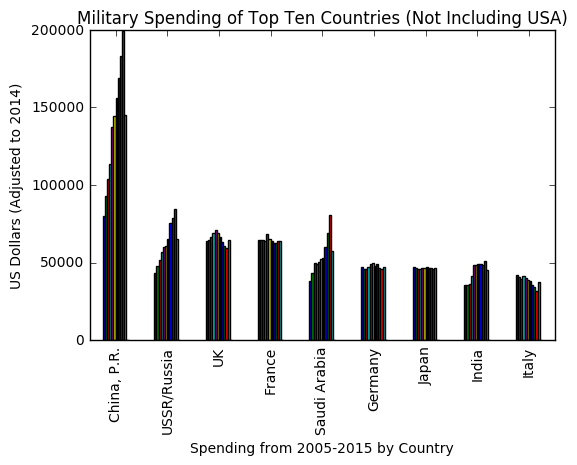

In [197]:
m_spend10_nomean = m_spend10.drop(m_spend10.columns[[10]], axis=1)
m_spend10_nomean_topten =m_spend10_nomean[1:10]
#Graph
B1=m_spend10_nomean_topten.plot(kind='bar',legend=False, title='Military Spending of Top Ten Countries (Not Including USA)')
B1.set(ylabel="US Dollars (Adjusted to 2014)", xlabel="Spending from 2005-2015 by Country")

In [198]:
#USA Percent GDP
percent_gdp10[13:14]*100

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
Country,,,,,,,,,,,,
USA,3.844238,3.808197,3.847053,4.220041,4.636805,4.665606,4.583984,4.238733,3.839023,3.515739,3.317105,4.046957


In [199]:
#Create a data frame for Power Point
ms_00=m_spend10.drop(m_spend10.columns[[0,1,2,3,4,5,6,7,12]],axis=1)
ms_00.head()

,2013,2014,2015,mean
Country,,,,
USA,650081.468798,609914.000000,595472.054945,668604.721257
"China, P.R.",182930.077777,199651.442932,214485.460938,144882.457240
USSR/Russia,79030.424094,84696.504653,91080.941893,65021.895298
UK,60766.435401,59182.858554,59729.580120,64838.563229
France,62686.493042,63613.569143,60746.975112,64095.268160
